# Ion Compostion Test

In [18]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [29]:
filename = '/Users/e30737/Desktop/Data/AMISR/PFISR/2017/20170905.002_lp_5min-fitcal.h5'
with h5py.File(filename, 'r') as h5:
    print(h5['FittedParams'].keys())
    utime = h5['Time/UnixTime'][:,0]
    alt = h5['Geomag/Altitude'][:]
    comp = h5['FittedParams/Fits'][:,:,:,:,0]
    ionmass = h5['FittedParams/IonMass'][:]
    
time = utime.astype('datetime64[s]')

<KeysViewHDF5 ['Altitude', 'Errors', 'FitInfo', 'Fits', 'IonMass', 'Ne', 'Noise', 'Range', 'dNe']>


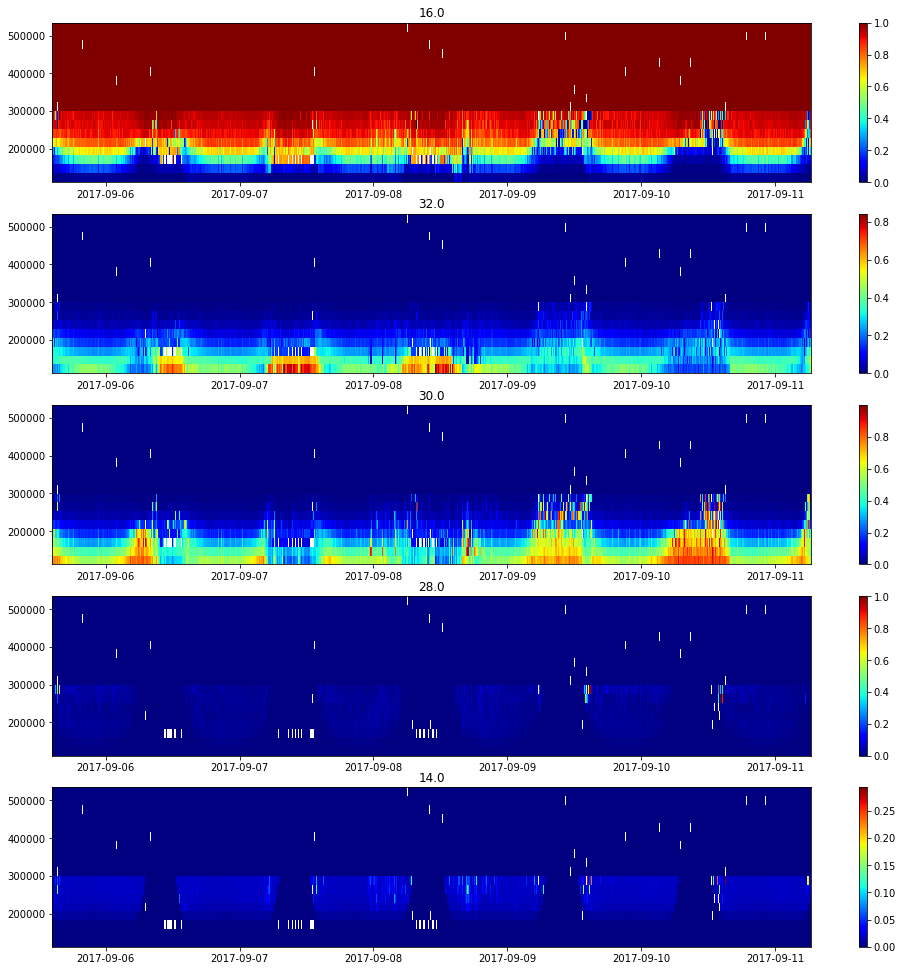

In [31]:
fig = plt.figure(figsize=(17,17))
gs = gridspec.GridSpec(len(ionmass),1)

finite_alt = np.isfinite(alt[10,:])

for i in range(len(ionmass)):
    ax = fig.add_subplot(gs[i])
    c = ax.pcolormesh(time, alt[10,finite_alt], comp[:,10,finite_alt,i].T, cmap='jet', vmin=0.)
    ax.set_title(ionmass[i])
    plt.colorbar(c)